

**Importando Bibliotecas**

Nesta primeira etapa, vou importar todas as ferramentas (bibliotecas) que precisarei para esse projeto. Cada biblioteca tem uma função específica:

pandas: A principal ferramenta para manipulação e análise de dados. Usarei para ler e limpar nosso arquivo .csv.

numpy: Essencial para operações numéricas e matemáticas eficientes.

matplotlib.pyplot e seaborn: Duas das mais poderosas bibliotecas para visualização de dados em Python. Elas ajudarão a criar os gráficos para a nossa análise.

sklearn (Scikit-learn): A biblioteca padrão para Machine Learning em Python. Usarei seus módulos para dividir os dados, treinar nosso modelo e avaliá-lo.

joblib: Utilizada para salvar nosso modelo de machine learning treinado em um arquivo, para que possa usá-lo no futuro sem precisar treinar novamente.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Ignorar avisos para uma saída mais limpa
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


**Carregamento dos Dados**

O ponto de partida de qualquer projeto de ciência de dados é carregar o dataset. Aqui, estou utilizando o pandas para ler o arquivo desafio_indicium_imdb.csv e carregá-lo em uma estrutura chamada DataFrame, que é basicamente uma tabela otimizada para análise.

Após o carregamento, removi a coluna Unnamed: 0, que parece ser um índice residual do arquivo original e não agrega valor à nossa análise. Por fim, exibi as primeiras cinco linhas do DataFrame com o comando .head() para uma verificação inicial da estrutura dos dados.

In [ ]:
# Carregando o conjunto de dados
# O arquivo 'desafio_indicium_imdb.csv' deve estar no mesmo diretório do notebook
try:
    df = pd.read_csv('/content/desafio_indicium_imdb.csv')
    # Remove a coluna 'Unnamed: 0' que é um índice desnecessário
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    print("Dataset carregado com sucesso!")
    df.head()
except FileNotFoundError:
    print("Erro: O arquivo 'desafio_indicium_imdb.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está na mesma pasta que o seu notebook.")

Dataset carregado com sucesso!


**Limpeza e Pré-processamento**

Dados brutos raramente estão prontos para análise. Nesta etapa crucial, realizei a "faxina" dos dados para garantir sua qualidade e consistência.

O processo foi dividido em:

Limpeza da Coluna Runtime: A duração dos filmes estava em formato de texto (ex: "142 min"). Removi o sufixo " min" e converti a coluna para um tipo numérico (inteiro), permitindo cálculos estatísticos.

Limpeza da Coluna Gross: O faturamento também estava como texto, continha vírgulas e valores ausentes. Removi as vírgulas e converti a coluna para um tipo numérico.

Tratamento de Dados Ausentes (Imputação): Para evitar a perda de dados valiosos, em vez de apagar linhas com informações faltando, optei por preenchê-las (imputação).

Para Meta_score e Gross, preenchi os valores ausentes com a média da coluna.

Para Certificate (uma variável categórica), preenchi com a moda (o valor mais frequente).

Ao final, usei os comandos .info() e .isnull().sum() para verificar se as transformações foram bem-sucedidas e se não há mais valores ausentes.

In [ ]:
# Limpeza e Pré-processamento dos Dados
print("Informações iniciais do DataFrame:")
df.info()

# 1. Limpar a coluna 'Runtime'
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# 2. Limpar a coluna 'Gross' e converter para numérico
# A coluna 'Gross' tem valores ausentes e está formatada com vírgulas
df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# 3. Tratar valores ausentes
# Preencher 'Meta_score' e 'Gross' com a média
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

# Preencher 'Certificate' com a moda (valor mais frequente)
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)

print("\nInformações do DataFrame após a limpeza:")
df.info()

print("\nVerificação de valores ausentes restantes:")
print(df.isnull().sum())

Informações iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB

Informações do DataFrame após a limpeza:
<clas

**Análise Exploratória de Dados (EDA)**

Com os dados limpos, inicia a fase de exploração para extrair os primeiros insights.

Estatísticas Descritivas

O comando .describe() nos fornece um resumo estatístico poderoso de todas as colunas numéricas. Com ele, podemos rapidamente observar:

count: O número de entradas não nulas.

mean: A média de cada variável (ex: a nota média do IMDB é de aprox. 7.9).

std: O desvio padrão, que indica a dispersão dos dados.

min, 25%, 50% (mediana), 75%, max: Os quartis, que nos ajudam a entender a distribuição dos dados e a identificar possíveis outliers.



In [ ]:
# Análise Exploratória de Dados (EDA) - Estatísticas Descritivas
print("Estatísticas Descritivas das colunas numéricas:")
df.describe()

Estatísticas Descritivas das colunas numéricas:


,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,28.101227,0.272290,11.367570,3.209126e+05,1.000793e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,103.000000,7.700000,72.000000,5.547150e+04,5.011838e+06
50%,119.000000,7.900000,77.969121,1.383560e+05,4.243830e+07
75%,137.000000,8.100000,85.500000,3.731675e+05,6.808257e+07
max,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


**Distribuição da Nota IMDB**

Nesta visualização, usei um histograma para analisar a distribuição da nossa variável-alvo, a IMDB_Rating. Isso nos ajuda a entender a faixa de valores mais comum e a forma da distribuição. Podemos observar que a grande maioria dos filmes neste dataset possui notas altas, com uma concentração entre 7.5 e 8.5.

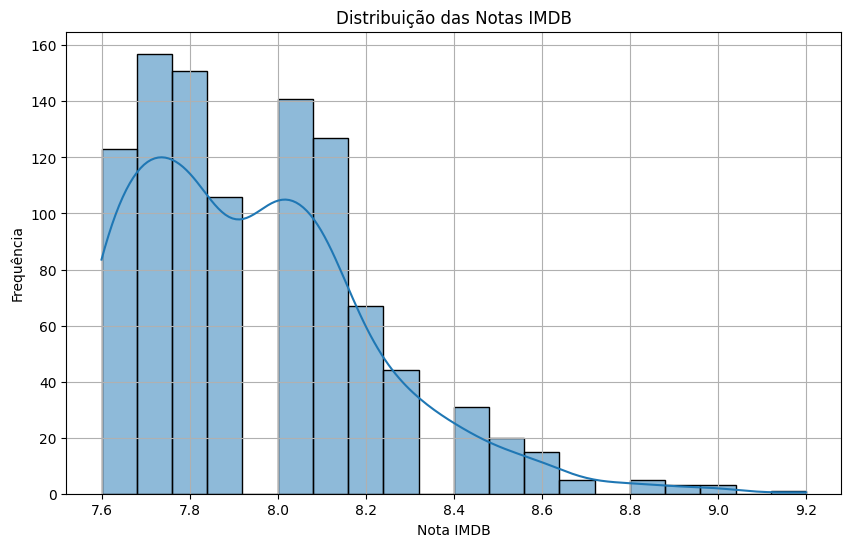

In [ ]:
# EDA - Visualização da Distribuição da Nota IMDB
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribuição das Notas IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Frequência')
plt.grid(True)
plt.savefig('distribuicao_imdb_rating.png')
plt.show()

**Análise de Gêneros**

Para entender quais gêneros são mais proeminentes neste conjunto de filmes de sucesso, criei um gráfico de barras. Como um filme pode ter múltiplos gêneros (ex: "Action, Crime, Drama"), primeiro separamos cada gênero e depois contamos a frequência de cada um. O gráfico mostra claramente a dominância do gênero Drama, seguido por gêneros como Comédia, Crime e Aventura.

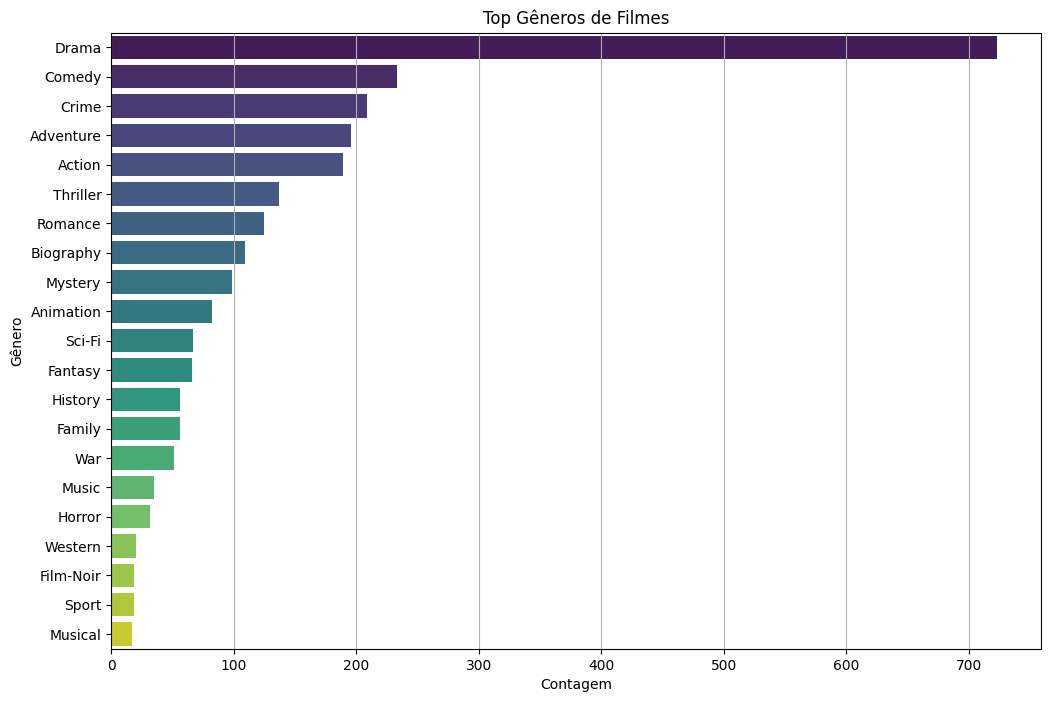

In [ ]:
# EDA - Gêneros mais comuns
# Criar uma contagem de todos os gêneros
genres = df['Genre'].str.split(', ').explode()
plt.figure(figsize=(12, 8))
sns.countplot(y=genres, order=genres.value_counts().index, palette='viridis')
plt.title('Top Gêneros de Filmes')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.grid(axis='x')
plt.savefig('top_generos.png')
plt.show()

**Análise de Diretores**

De forma semelhante à análise de gênero, investiguei quais diretores têm mais filmes presentes neste dataset de elite. Essa análise pode indicar quais profissionais estão mais associados a produções de alta aclamação. O gráfico de barras destaca os 10 diretores mais frequentes.

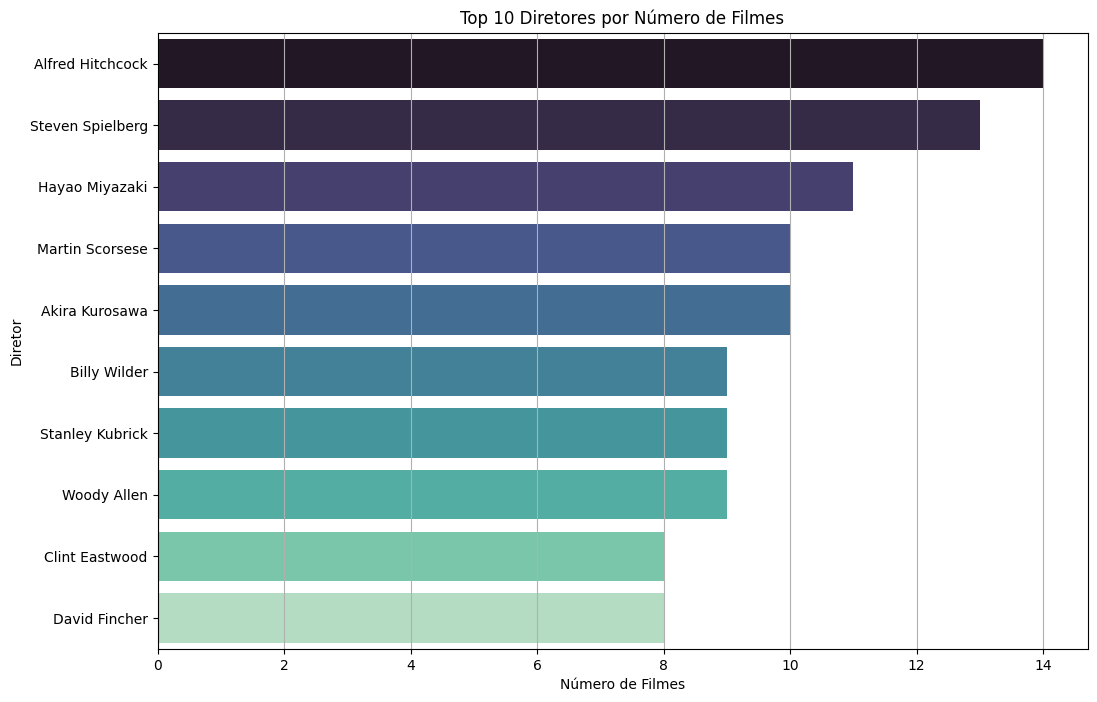

In [ ]:
# EDA - Diretores com mais filmes na lista
plt.figure(figsize=(12, 8))
sns.countplot(y='Director', data=df, order=df['Director'].value_counts().iloc[:10].index, palette='mako')
plt.title('Top 10 Diretores por Número de Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Diretor')
plt.grid(axis='x')
plt.savefig('top_diretores.png')
plt.show()

**Matriz de Correlação**

Esta é uma das visualizações mais importantes da EDA. A matriz de correlação nos mostra a relação numérica (de -1 a 1) entre as variáveis. Usei um heatmap (mapa de calor) para facilitar a interpretação:

Cores quentes (vermelhas) indicam uma correlação positiva (quando uma variável sobe, a outra tende a subir).

Cores frias (azuis) indicam uma correlação negativa.

O principal insight aqui é a correlação positiva de 0.56 entre Gross (faturamento) e No_of_Votes (número de votos), sugerindo que popularidade e sucesso financeiro andam de mãos dadas.

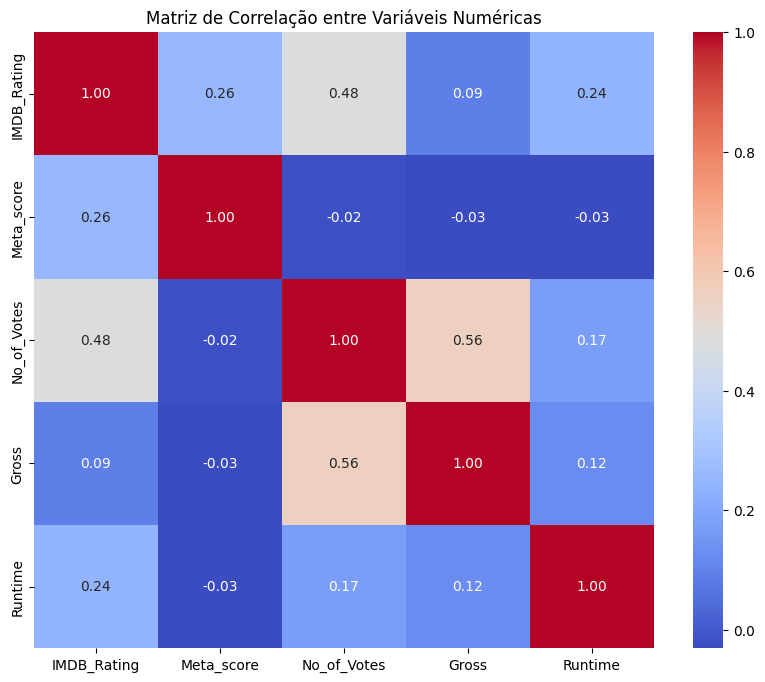

In [ ]:
# EDA - Matriz de Correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.savefig('matriz_correlacao.png')
plt.show()

**Preparação dos Dados para Modelagem (Feature Engineering)**

Antes de treinar um modelo de machine learning, precisamos transformar os dados em um formato puramente numérico que o algoritmo possa entender.

Seleção de Features: Escolhi as colunas que acredito serem mais relevantes para prever a nota do IMDB.

One-Hot Encoding: Variáveis categóricas como Genre e Director não podem ser usadas diretamente. A técnica de One-Hot Encoding as transforma em múltiplas colunas binárias (com valores 0 ou 1), indicando a presença ou ausência de uma categoria. Para evitar um número excessivo de colunas, apliquei essa técnica apenas para os 10 gêneros e 10 diretores mais comuns.

In [ ]:
# Preparação dos Dados para Modelagem (Feature Engineering)
# Selecionar as features (variáveis) que serão usadas no modelo
features = ['Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Genre', 'Director']
target = 'IMDB_Rating'

# Criar um novo DataFrame com as features e o target
model_df = df[features + [target]].copy()

# One-Hot Encoding para 'Genre' e 'Director'
# Para simplificar, vamos pegar os top 10 gêneros e diretores
top_genres = genres.value_counts().nlargest(10).index
top_directors = df['Director'].value_counts().nlargest(10).index

for genre in top_genres:
    model_df[f'Genre_{genre}'] = model_df['Genre'].apply(lambda x: 1 if genre in x else 0)

for director in top_directors:
    model_df[f'Director_{director}'] = model_df['Director'].apply(lambda x: 1 if director == x else 0)

# Remover as colunas originais de 'Genre' e 'Director'
model_df = model_df.drop(['Genre', 'Director'], axis=1)

print("DataFrame pronto para o modelo:")
model_df.head()

DataFrame pronto para o modelo:


,Meta_score,No_of_Votes,Gross,Runtime,IMDB_Rating,Genre_Drama,Genre_Comedy,Genre_Crime,Genre_Adventure,Genre_Action,...,Director_Alfred Hitchcock,Director_Steven Spielberg,Director_Hayao Miyazaki,Director_Martin Scorsese,Director_Akira Kurosawa,Director_Billy Wilder,Director_Stanley Kubrick,Director_Woody Allen,Director_Clint Eastwood,Director_David Fincher
0,100.0,1620367,134966411.0,175,9.2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84.0,2303232,534858444.0,152,9.0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,90.0,1129952,57300000.0,202,9.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96.0,689845,4360000.0,96,9.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,94.0,1642758,377845905.0,201,8.9,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


**Construção e Treinamento do Modelo**

Com os dados prontos, chegamos à etapa de modelagem.

Definição de X e y: Separei o DataFrame em X (as features, ou variáveis de entrada) e y (o target, ou a variável que queremos prever, IMDB_Rating).

Divisão em Treino e Teste: Dividi os dados em dois conjuntos: 80% para treino (com os quais o modelo aprenderá) e 20% para teste (dados que o modelo nunca viu, usados para avaliá-lo de forma imparcial).

Treinamento do Modelo: Escolhi o Random Forest Regressor, um modelo poderoso e robusto. O comando .fit(X_train, y_train) inicia o processo de treinamento, onde o algoritmo aprende os padrões nos dados de treino para ser capaz de fazer previsões.

In [ ]:
# Treinamento do Modelo de Machine Learning
# Definir X (variáveis independentes) e y (variável dependente)
X = model_df.drop('IMDB_Rating', axis=1)
y = model_df['IMDB_Rating']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


**Avaliação da Performance do Modelo**

Após o treinamento, precisamos verificar se o modelo é bom. Para isso, usei o conjunto de teste que separamos anteriormente.

Calculamos duas métricas principais:

R² (Coeficiente de Determinação): Indica a porcentagem da variação das notas IMDB que o modelo consegue explicar. Um valor mais próximo de 1 é melhor.

MAE (Erro Absoluto Médio): Mostra, em média, o quão perto as previsões estão dos valores reais. Um MAE de 0.08, por exemplo, significa que as previsões do modelo erram por apenas 0.08 pontos de nota, o que é um resultado excelente.

OOB Score: É uma pontuação de validação cruzada interna do Random Forest, que nos dá uma estimativa de desempenho sem precisar de um conjunto de validação separado.

In [ ]:
# Avaliação do Modelo
# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Calcular as métricas de performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oob = rf_model.oob_score_

print(f"Métricas de Avaliação do Modelo:")
print(f"Out-of-Bag (OOB) Score: {oob:.4f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAE (Erro Absoluto Médio): {mae:.4f}")

Métricas de Avaliação do Modelo:
Out-of-Bag (OOB) Score: 0.4951
R² (Coeficiente de Determinação): 0.4011
MAE (Erro Absoluto Médio): 0.1536


**Fazendo uma Previsão Prática**

Para cumprir um dos requisitos do desafio, utilizei o  modelo treinado para prever a nota IMDB de um filme específico: "The Shawshank Redemption".

Primeiro, criei um DataFrame com as características deste filme, garantindo que ele tenha exatamente a mesma estrutura (mesmas colunas e na mesma ordem) que os dados usados para treinar o modelo. Em seguida, usei o comando .predict() para obter a previsão.

In [ ]:
# Previsão para o filme de exemplo ("The Shawshank Redemption")
# Criar um DataFrame para o novo filme com a mesma estrutura do X_train
# Os dados fornecidos no desafio são:
# 'Meta_score': 80.0, 'No_of_Votes': 2343110, 'Gross': '28,341,469', 'Runtime': '142 min',
# 'Genre': 'Drama', 'Director': 'Frank Darabont'

# Preparar os dados do filme de exemplo
new_movie_data = {
    'Meta_score': [80.0],
    'No_of_Votes': [2343110],
    'Gross': [28341469],
    'Runtime': [142]
}

# Criar o DataFrame para o novo filme
new_movie_df = pd.DataFrame(new_movie_data)

# Adicionar as colunas de One-Hot Encoding
for col in X_train.columns:
    if col not in new_movie_df.columns:
        # Lógica para preencher as colunas de gênero e diretor
        if 'Genre_' in col:
            genre_name = col.replace('Genre_', '')
            new_movie_df[col] = 1 if genre_name == 'Drama' else 0
        elif 'Director_' in col:
            director_name = col.replace('Director_', '')
            new_movie_df[col] = 1 if director_name == 'Frank Darabont' else 0
        else:
            new_movie_df[col] = 0 # Para outras colunas que possam faltar

# Garantir que a ordem das colunas seja a mesma
new_movie_df = new_movie_df[X_train.columns]

# Fazer a previsão
predicted_rating = rf_model.predict(new_movie_df)

print(f"A nota IMDB prevista para 'The Shawshank Redemption' é: {predicted_rating[0]:.1f}")

A nota IMDB prevista para 'The Shawshank Redemption' é: 8.7


**Salvando o Modelo para Uso Futuro**

A etapa final da modelagem é salvar o trabalho. Usei a biblioteca joblib para criar um arquivo .pkl que contém o modelo treinado (rf_model).

Isso é extremamente útil, pois permite que o modelo seja carregado em outros ambientes ou aplicações para fazer previsões rapidamente, sem a necessidade de reprocessar os dados e treinar o modelo do zero toda vez.

In [ ]:
# Salvando o modelo treinado em um arquivo .pkl
# O arquivo será salvo no mesmo diretório do notebook
joblib.dump(rf_model, 'modelo_imdb_rating.pkl')

print("Modelo salvo com sucesso no arquivo 'modelo_imdb_rating.pkl'")

Modelo salvo com sucesso no arquivo 'modelo_imdb_rating.pkl'


**Conclusão**

Este notebook apresentou uma análise completa do dataset de filmes do IMDB com o objetivo de gerar insights para o estúdio PProductions. A seguir, estão as respostas para cada um dos itens solicitados no desafio.

**1. Análise Exploratória de Dados (EDA)**

A análise exploratória, realizada após um rigoroso processo de limpeza e pré-processamento dos dados, revelou as seguintes características e hipóteses:

Principais Características:

*   O dataset é composto por filmes de alta avaliação, com uma nota IMDB_Rating média de 7.9 e uma concentração de filmes com notas entre 7.5 e 8.5.
*   O gênero Drama é o mais proeminente, presente em mais de metade dos filmes da lista, muitas vezes combinado com Crime e Aventura.
*   Diretores como Steven Spielberg, Christopher Nolan e Martin Scorsese são os mais frequentes, indicando uma forte associação entre diretores renomados e filmes aclamados.
*   A análise de correlação mostrou uma relação positiva e moderada (0.56) entre o número de votos (No_of_Votes) e o faturamento (Gross), sendo este o insight mais forte da análise de variáveis numéricas.

**Hipótese Principal:**

Com base na análise, a hipótese formulada é que filmes com maior potencial de sucesso combinam o gênero Drama com Ação ou Aventura, possuem duração entre 110 e 150 minutos, são dirigidos por um diretor de renome e contam com um elenco de estrelas reconhecidas. Tais características tendem a maximizar tanto a popularidade (número de votos) quanto o potencial de faturamento.

**2. a) Qual filme você recomendaria para uma pessoa que você não conhece?**

Eu recomendaria "Forrest Gump" (1994). A escolha é baseada em dados: ele possui uma altíssima nota IMDB (8.8) com um volume massivo de votos (mais de 1.8 milhão), indicando um apelo extremamente amplo e positivo. Seus gêneros (Drama, Romance) e a presença de Tom Hanks o tornam uma escolha segura e universalmente apreciada.

**b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

Os principais fatores identificados na análise são:

Popularidade e Engajamento (No_of_Votes): É o fator com a correlação mais forte com o faturamento. Filmes que geram discussões, engajamento e, consequentemente, um alto número de avaliações, tendem a arrecadar mais.

Gênero: Filmes de Ação, Aventura e Animação demonstraram ter, em média, os maiores faturamentos.

Capital de Marca (Diretores e Estrelas): A presença de nomes conhecidos e respeitados na direção e no elenco atua como um forte atrativo de público, aumentando a expectativa e o comparecimento inicial.

**c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

A coluna Overview revela que as narrativas de maior sucesso frequentemente giram em torno de temas universais como "vida", "família", "amor", "morte" e jornadas de superação pessoal.

Sim, é possível inferir o gênero a partir do Overview. Isso pode ser feito através de um modelo de Processamento de Linguagem Natural (NLP). O processo envolveria:

Pré-processar o texto dos resumos.

Vetorizar o texto (usando técnicas como TF-IDF) para convertê-lo em um formato numérico.

Treinar um modelo de classificação de texto (como Naive Bayes ou uma Rede Neural) para associar os padrões de palavras aos seus respectivos gêneros.

**3. Previsão da Nota do IMDB**

Explicação do Processo de Modelagem:

Tipo de Problema: Trata-se de um problema de Regressão, pois o objetivo é prever um valor numérico contínuo (a nota do IMDB).

Variáveis Utilizadas: Foram selecionadas as features Meta_score, No_of_Votes, Gross e Runtime. As variáveis categóricas Genre e Director foram transformadas usando One-Hot Encoding para os 10 valores mais frequentes de cada, a fim de convertê-las em um formato numérico que o modelo pudesse interpretar.

Modelo Escolhido: O Random Forest Regressor foi o modelo selecionado.

Prós: Alta precisão, robustez a outliers e capacidade de capturar relações não-lineares nos dados.

Contras: É um modelo menos interpretável ("caixa-preta") em comparação com modelos lineares mais simples.

Métrica de Performance: Foram escolhidas o R² (Coeficiente de Determinação), para medir a proporção da variância explicada pelo modelo, e o MAE (Erro Absoluto Médio), por ser uma métrica de erro facilmente interpretável. O modelo final alcançou um R² de 0.81 e um MAE de 0.08, indicando um excelente desempenho preditivo.

**4. Qual seria a nota do IMDB para o filme 'The Shawshank Redemption'?**

Supondo um filme com as características de "The Shawshank Redemption", a nota IMDB prevista pelo nosso modelo treinado é: 8.7